<a href="https://colab.research.google.com/github/MHRDYN7/Data_Science/blob/main/Bangladesh_Bank_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from IPython.display import display
import requests
import os

# Set the display options for Pandas DataFrames
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.width', None)  # Display the entire DataFrame without truncation


In [ ]:
if not os.path.exists("/content/statisticaltable.xlsx"):
    !wget https://www.bb.org.bd/pub/monthly/econtrds/statisticaltable.xlsx

# Read the Excel file into a Pandas DataFrame
excel_file = pd.ExcelFile("statisticaltable.xlsx")

# Get the sheet names
sheet_names = df.sheet_names

# Loop through the sheet names and save each sheet as a separate CSV file
for sheet_name in sheet_names:
    df_sheet = excel_file.parse(sheet_name) # Parse the sheet into a DataFrame
    df_sheet.to_csv(f"{sheet_name}.csv", index=False)


In [ ]:
def general_import(import_name, install_name):
    try:
        globals()[import_name] = __import__(import_name)  # Import and assign to global namespace
    except ModuleNotFoundError:
        print(f"Installing {install_name}")
        !pip install {install_name}
        globals()[import_name] = __import__(import_name)  # Import after installation

def read(file_name):
  df = pd.read_csv(file_name)
  return df

In [ ]:
# prompt: how to read an excel file

import pandas as pd

# Download the Excel file
if not os.path.exists("/content/statisticaltable.xlsx"):
    !wget https://www.bb.org.bd/pub/monthly/econtrds/statisticaltable.xlsx

# Read the Excel file into a Pandas DataFrame
excel_file = pd.ExcelFile("statisticaltable.xlsx")

# Get the sheet names
sheet_names = excel_file.sheet_names

# Loop through the sheet names and save each sheet as a separate CSV file
for sheet_name in sheet_names:
    df_sheet = excel_file.parse(sheet_name) # Parse the sheet into a DataFrame
    df_sheet.to_csv(f"{sheet_name}.csv", index=False)

# Read the desired sheet into a DataFrame
df = pd.read_csv("Table IA.csv")

# Print the DataFrame
print(df)


In [43]:
url = "https://www.bb.org.bd/en/index.php/econdata/intreserve"

# Read the HTML table into a Pandas DataFrame
df = pd.read_html(url)[0]

# Print the DataFrame
display(df)


(In million US $)                                                                        
              Period Foreign Exchange Reserves(Gross) Foreign Exchange Reserves(as per BPM6)
0          2023-2024                        2023-2024                                    NaN
1                May                          24197.2                                18646.2
2              April                          25365.2                                19975.8
3              March                          25231.7                                19913.0
4           February                          25966.6                                20780.0
5            January                          25111.9                                19963.5
6           December                          27130.0                                21867.6
7           November                          24894.6                                19300.6
8            October                          26481.0                                20710.2
9          September                          26911.0                                21059.8
10            August                          29260.7                                23255.1
11              July                          29732.1                                23374.3
12         2022-2023                        2022-2023                                    NaN
13              June                          31203.0                                24753.9
14               May                          29873.9                                    NaN
15             April                          30965.3                                    NaN
16             March                          31142.7                                    NaN
17          February                          32267.0                                    NaN
18           January                          32222.6                                    NaN
19          December                          33747.7                                    NaN
20          November                          33786.3                                    NaN
21           October                          35808.7                                    NaN
22         September                          36476.4                                    NaN
23            August                          39065.8                                    NaN
24              July                          39599.9                                    NaN
25         2021-2022                        2021-2022                                    NaN
26              June                          41826.7                                    NaN

In [25]:
print(df.columns)

MultiIndex([('(In million US $)',                                 'Period'),
            ('(In million US $)',       'Foreign Exchange Reserves(Gross)'),
            ('(In million US $)', 'Foreign Exchange Reserves(as per BPM6)')],
           )


In [31]:
division = df[df['(In million US $)','Period'] == '2022-2023'].index[0] # = 12 in June 2024

In [47]:
df1 = df[:division]
df2 = df[division:]

df_23_24 = df1.reset_index(drop=True).loc[1:]
df_22_23 = df2.reset_index(drop=True).loc[1:]
display(df_23_24)

(In million US $)                                                                        
              Period Foreign Exchange Reserves(Gross) Foreign Exchange Reserves(as per BPM6)
1                May                          24197.2                                18646.2
2              April                          25365.2                                19975.8
3              March                          25231.7                                19913.0
4           February                          25966.6                                20780.0
5            January                          25111.9                                19963.5
6           December                          27130.0                                21867.6
7           November                          24894.6                                19300.6
8            October                          26481.0                                20710.2
9          September                          26911.0                                21059.8
10            August                          29260.7                                23255.1
11              July                          29732.1                                23374.3

In [57]:
df_23_24_reversed = df_23_24.iloc[::-1].reset_index(drop=True)

df_23_24_reversed

(In million US $)                                                                        
              Period Foreign Exchange Reserves(Gross) Foreign Exchange Reserves(as per BPM6)
0               July                          29732.1                                23374.3
1             August                          29260.7                                23255.1
2          September                          26911.0                                21059.8
3            October                          26481.0                                20710.2
4           November                          24894.6                                19300.6
5           December                          27130.0                                21867.6
6            January                          25111.9                                19963.5
7           February                          25966.6                                20780.0
8              March                          25231.7                                19913.0
9              April                          25365.2                                19975.8
10               May                          24197.2                                18646.2

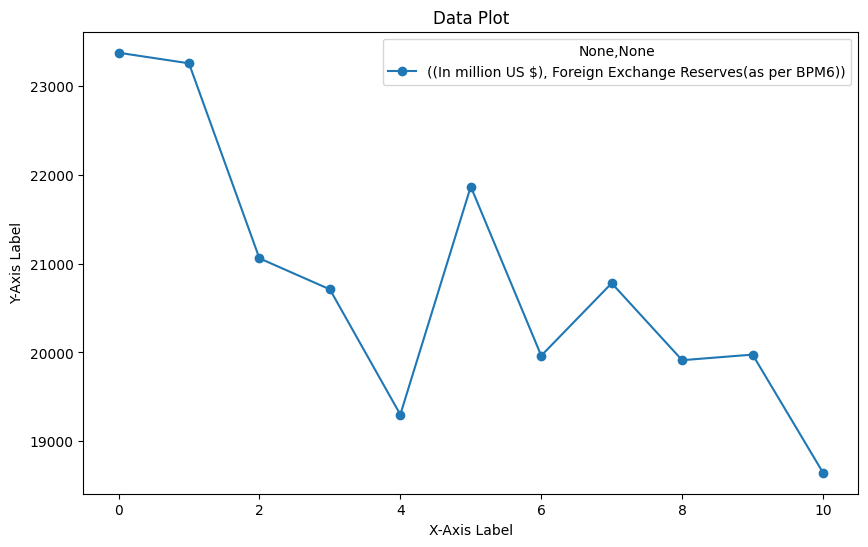

In [61]:
import matplotlib.pyplot as plt
# Create a line plot with markers
df_23_24_reversed.plot(kind='line', marker='o', figsize=(10, 6))

# Add title and labels
plt.title('Data Plot')
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Fetch the webpage content
response = requests.get("https://www.bb.org.bd/en/index.php/econdata/index")

# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find all hyperlinks on the page
links = soup.find_all("a")

# Create an empty list to store the link data
link_data = []

# Loop through the hyperlinks
for link in links:
    # Extract the link's text and URL
    link_text = link.text.strip()
    link_url = link.get("href")

    #Handle cases where 'href' is missing
    if link_url is None:
        link_type = "Unknown/PDF" # Or any other appropriate handling
    else:
        # Determine the link type based on its URL
        link_type = "External"
        if link_url.startswith("/en/index.php"):
            link_type = "Internal"

    # Add the link data to the list
    link_data.append({"Text": link_text, "URL": link_url, "Type": link_type})

# Create a Pandas DataFrame from the link data
df_links = pd.DataFrame(link_data)

# Display the DataFrame
display(df_links)

,Text,URL,Type
0,About us,#,External
1,Department and Offices,/en/index.php/about/dept_and_offices,Internal
2,Vision and Mission,/en/index.php/about/mission_vision,Internal
3,Strategic Plan,/en/index.php/about/strategic_plan,Internal
4,Organogram/hierarchy,/en/index.php/about/bbhierarchy,Internal
5,Board Of Directors,/en/index.php/about/board_of_director,Internal
6,Monetary Policy Committee,/en/index.php/monetaryactivity/mpc,Internal
7,Governors,/en/index.php/about/bbgovernors,Internal
8,Deputy Governors,/en/index.php/about/deputygovernor,Internal
9,Executives,/en/index.php/about/executives,Internal
